## Keysteps of segmentation project

1. Gather data-updated data with an additional variable
2. Pre-process the data
3. Explore the data and decide on the number of clusters
4. Run k-means clustering

## Importing python modules

In [67]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv("datamart_rfm.csv")

In [19]:
df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


## Calculating the statistics of Variable

You will now calculate average and standard deviation values for the variables, and also print key statistics of the dataset.

You can use the console to explore the dataset.

In [20]:
# Print the average values of the variables in the dataset
print("Mean of the dataset: \n",df.mean())

# Print the standard deviation of the variables in the dataset
print("Standard Deviation of the dataset: \n",df.std())

# Get the key statistics of the dataset
print("Key statistics of data: \n",df.describe())

Mean of the dataset: 
 CustomerID       15551.620642
Recency             90.435630
Frequency           18.714247
MonetaryValue      370.694387
dtype: float64
Standard Deviation of the dataset: 
 CustomerID       1562.587958
Recency            94.446510
Frequency          43.754468
MonetaryValue    1347.443451
dtype: float64
Key statistics of data: 
          CustomerID     Recency    Frequency  MonetaryValue
count   3643.000000  3643.00000  3643.000000    3643.000000
mean   15551.620642    90.43563    18.714247     370.694387
std     1562.587958    94.44651    43.754468    1347.443451
min    12747.000000     1.00000     1.000000       0.650000
25%    14209.500000    19.00000     4.000000      58.705000
50%    15557.000000    51.00000     9.000000     136.370000
75%    16890.000000   139.00000    21.000000     334.350000
max    18287.000000   365.00000  1497.000000   48060.350000


## Detect skewed variables

We have created a dataset called data for you with three variables: var1, var2 and var3. You will now explore their distributions.

The plt.subplot(...) call before the seaborn function call allows you to plot several subplots in one chart, you do not have to change it.

Libraries seaborn and matplotlib.pyplot have been loaded as sns and plt respectively. Feel free to explore the dataset in the console.

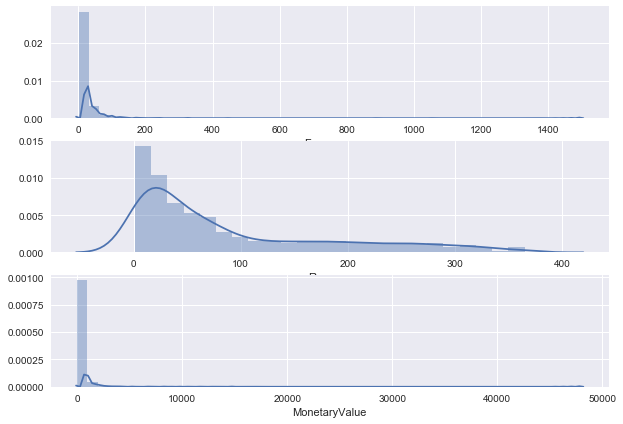

In [87]:
# Figure size
plt.figure(figsize=(10,7))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(df['Frequency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(df['Recency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(df['MonetaryValue'])

# Show the plot
plt.show()

## Manage skewness

Now your goal will be to remove skewness from var2 and var3 as they had a non-symmetric distribution as you've seen in the previous exercise plot. You will visualize them to make sure the problem is solved!

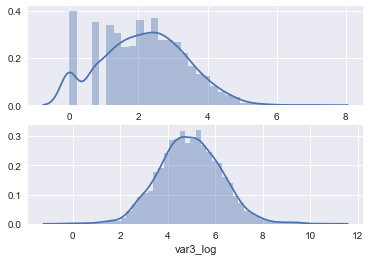

In [22]:
# Apply log transformation to var2
df['var2_log'] = np.log(df['Frequency'])

# Apply log transformation to var3
df['var3_log'] = np.log(df['MonetaryValue'])

# Create a subplot of the distribution of var2_log
plt.subplot(2, 1, 1); sns.distplot(df['var2_log'])

# Create a subplot of the distribution of var3_log
plt.subplot(2, 1, 2); sns.distplot(df['var3_log'])

# Show the plot
plt.show()

In [89]:
df1 = df.drop('CustomerID',axis=1, inplace= True)

In [90]:
# Centering variables with diffrent means
# K-means works well on variables with the same mean
# Centering variables is done by subtracting average value from each observation

datamart_centered = df - df.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,0.00,-0.00,0.00
std,94.45,43.75,1347.44
min,-89.44,-17.71,-370.04
25%,-71.44,-14.71,-311.99
50%,-39.44,-9.71,-234.32
75%,48.56,2.29,-36.34
max,274.56,1478.29,47689.66


## Scaling Varibales with different variance

In [91]:
# K-means works better on variables with the same variance / standard deviation
# Scaling variables is done by dividing them  by standard deviation of each
datamart_scaled = df / df.std()
datamart_scaled.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,0.96,0.43,0.28
std,1.00,1.00,1.00
min,0.01,0.02,0.00
25%,0.20,0.09,0.04
50%,0.54,0.21,0.10
75%,1.47,0.48,0.25
max,3.86,34.21,35.67


## Combining centering and scaling

In [92]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(df)

# Scale and center the data
datamart_normalized = scaler.transform(df)

print('mean:  ', datamart_normalized.mean(axis=0).round(2))
print('std:  ', datamart_normalized.std(axis=0).round(2))

mean:   [-0. -0.  0.]
std:   [ 1.  1.  1.]


## Preprocessing Pipeline

1. Unskew the data -log transform
2. Standardize to the same average values
3. Scale to the same standard deviation
4. Store as a separate array to be used for clustering

#### Visualizing RFM Distributions

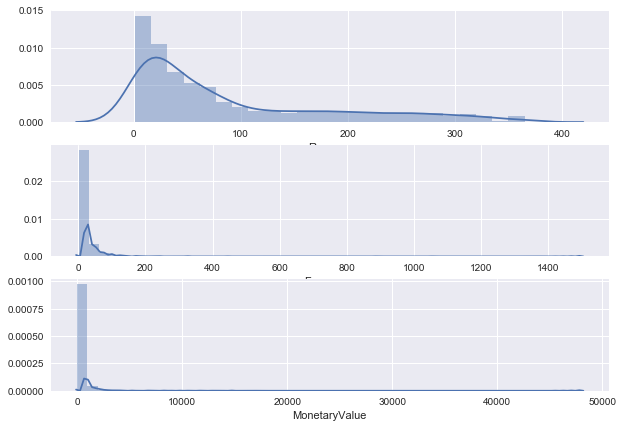

In [93]:
plt.figure(figsize=(10,7))
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(df['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(df['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(df['MonetaryValue'])

# Show the plot
plt.show()

## Preprocess RFM Data

In [94]:
# Unskew the data
datamart_log = np.log(df)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=df.index, columns=df.columns)


## Visualize the normalized variables

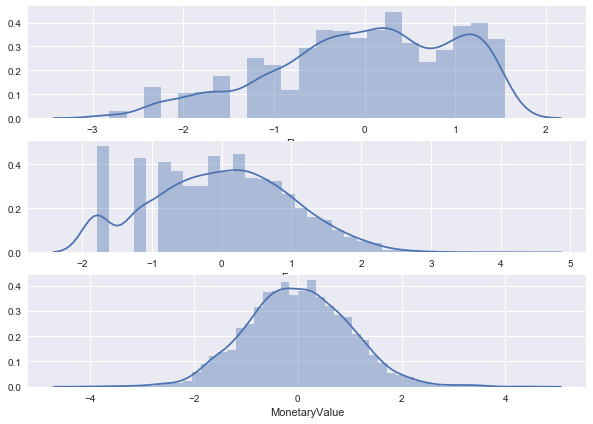

In [95]:
plt.figure(figsize=(10,7))
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

In [96]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

## Assign labels to raw data

You will now analyze the average RFM values of the three clusters you've created in the previous exercise. We have loaded the raw RFM dataset as datamart_rfm, and the cluster labels as cluster_labels. pandas is available as pd.

In [97]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = df.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          16.1      50.1        1050.6   901
1         166.6       3.0          53.0  1156
2          77.1      12.3         216.0  1586

## Elbow criterion method

1. Plot the number of cluster against within-cluster sum-of-squared-errors(SSE)-
   sum of squred distances from every data point to their center
2. Identify an "elbow" in the plot
3. Elbow - a point representing an "optimal' number of clusters

In [107]:
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ 

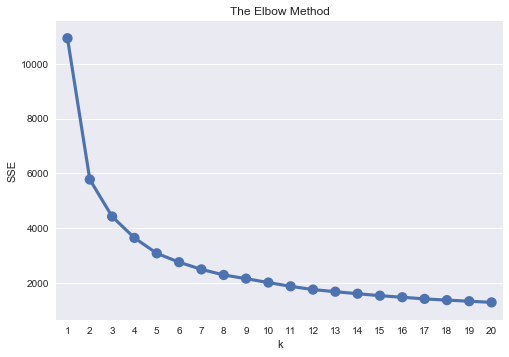

In [108]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## Calculate relative importance of each attribute

Now you will calculate the relative importance of the RFM values within each cluster.


In [110]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = df.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.82       1.68           1.83
1           0.84      -0.84          -0.86
2          -0.15      -0.34          -0.42


## Plot relative importance heatmap

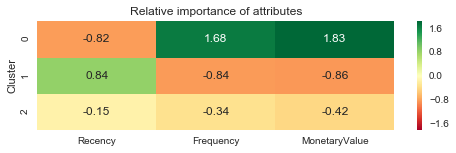

In [111]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()